# Customer Segmentation using K-means

source: https://analyticsindiamag.com/comparison-of-k-means-hierarchical-clustering-in-customer-segmentation/

**Identification of customers** based on their choices and other behaviors is an important strategy in any organization. 
* This identification may help in approaching customers with specific offers and products. 
* An organization with a large number of customers may experience difficulty in identifying and placing into a record each customer individually. 
* A huge amount of data processing and automated techniques are involved in extracting insights from the large information collected on customers.

Clustering, an unsupervised technique in machine learning (ML), helps identify customers based on their key characteristics. 
* We will discuss the **identification and segmentation of customers** using K-Means clustering. 

## The Problem Statement

Imagine a mall which has recorded the details of **200** of its **customers** through a membership campaign. Now, it has information about customers, including their gender, age, annual income and a **spending score**. This spending score is given to customers based on their past spending habits from purchases they made from the mall.

* Now, suppose the mall is **launching a luxurious product** and wants **to reach out to potential customers** who can buy it. 
* Approaching every customer will take a lot of time and will be an expensive exercise. 
* Hence, using the information on customers, the mall may want to `segregate customers who have the potential to buy a luxurious product`. 
* This problem can be addressed through clustering, where we can place customers into different segments and identify potential customers.

We can represent the customer on a two-dimensional Euclidean space where X-axis will represent the annual income of customers, and Y-axis will represent the spending score of customers. 
* After representing each of the customers on this plane, using a clustering technique, we can form the **groups of customers**. 
* Now, on the basis of their income and spending score, we can `identify the group of customers who have the potential to buy a luxurious product`. 

Now, we are going to implement the K-Means clustering technique in segmenting the customers, follow the steps below:

1. Import the basic libraries to read the CSV file and visualize the data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

2. Read the dataset that is in a CSV file. Define the dataset for the model

In [4]:
dataset = pd.read_csv('https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


3. In order to implement the K-Means clustering, we need to find the optimal number of clusters in which customers will be placed. To find the **optimal number of clusters** for K-Means, the `Elbow method` is used

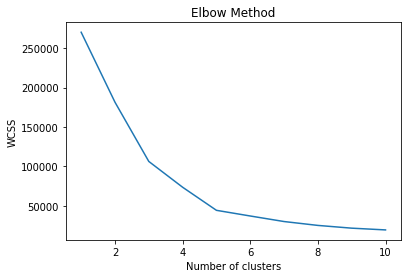

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia_ is sum of squared distance of samples to its closest cluster centers.
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As we can see in the above figure, the above plot is visualized as a hand and we need to identify the location of the **elbow** on the X-axis. In the above plot, the elbow seems to be on **point 5** of X-axis. So, the **optimal number of clusters will be 5** for the K-Means algorithm.

4. After finding the optimal number of clusters, **fit the K-Means clustering** model to the dataset defined in the second step and then predict clusters for each of the data elements. It means it will predict which of the 5 clusters the data item will belong to.

In [18]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

5. When the algorithm predicts a cluster for each of the data items, we need to **visualize the result** through the plot. For better representation, we need to give each of the clusters a unique colour and name.

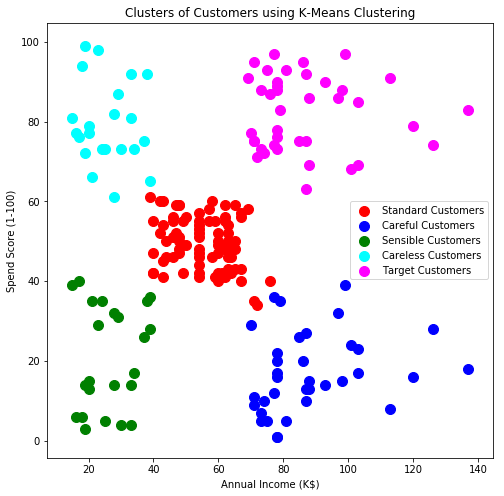

In [23]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Standard Customers')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'blue', label = 'Careful Customers')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'green', label = 'Sensible Customers')
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'cyan', label = 'Careless Customers')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'magenta', label = 'Target Customers')
plt.title('Clusters of Customers using K-Means Clustering')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spend Score (1-100)')
plt.legend()
plt.show()

The **name of clusters** is given based on their income and spending.  
For example, 
* when referring to a customer with low income and high spending, we have used cyan colour. 
* This group indicates ‘`Careless Customer`’ since despite having a low income, they spend more. 
* **To sell a luxurious product**, a person with `high income and high spending habits` should be targeted. This group of customers is represented in magenta colour in the above diagram.


 6. Now we can select the customers belonging to the target cluster (Target Customers)

In [27]:
dataset[kmeans.labels_ == 2]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
123,124,Male,39,69,91
125,126,Female,31,70,77
127,128,Male,40,71,95
129,130,Male,38,71,75
131,132,Male,39,71,75
133,134,Female,31,72,71
135,136,Female,29,73,88
137,138,Male,32,73,73
139,140,Female,35,74,72
141,142,Male,32,75,93
